# Transport-reaction and reaction-diffusion problems 

We consider the problem
$$\begin{equation*}
\left \{
\begin{array}{ll}
\frac{\partial u}{\partial t}(x,t) + r u(x,t)+ c\frac{\partial u}{\partial x}(x,t)-\nu \frac{\partial^2 u}{\partial x^2}(x,t) =0, & x\in]0,L[,t\in]0,T],\\
u(0,t)=u(L,t), \partial_x u(0,t)=\partial_x u(L,t), & t\in]0,T],\\
u(x,0)=u_0(x), & x\in]0,L[,
\end{array}
\right.
\end{equation*}
$$
where $r$, $c$ and $\nu$ are three given positive constants. The transport-reaction problem corresponds to $\nu=0$ and the reaction-diffusion problem to $c=0$.

We introduce the following discretization points
$$x_j=j \delta x, \hspace{0.5cm}\hbox{for } j=0,...,N_x-1,$$ 
$$t_n=n \delta t, \hspace{0.5cm}\hbox{for } n=0,...,N_t-1,$$ 
where the discretization steps are given by $\delta x =\frac{L}{N_x-1}$ and $\delta t =\frac{T}{N_t-1}$.

To obtain an approximate solution $u^n_j$ of $u(x_j,t_n)$, we use the scheme
$$\frac{u^{n+1}_j-u^{n}_j}{\delta t} + r u^n_j+ c\frac{u^n_{j+1}-u^n_{j-1}}{2\delta x}-\nu \frac{u^n_{j+1}-2u^n_{j}+u^n_{j-1}}{\delta x^2} =0, \hspace{1cm} j=0,...,N_x-2,\hspace{0.5cm} n=0,...,N_t-2,$$
completed with the periodic boundary conditions and the initial condition. 

The problem can be written in the matrix form
$$U^{n+1}=\big((1-r\delta t)I+A+B\big) U^{n}$$
where
$$U^n=\begin{pmatrix} u_0^n \\ \vdots \\u_{N_x-2}^n \end{pmatrix}, \hspace{0.5cm} A=-\frac{c\delta t}{2\delta x} \begin{pmatrix} 
0 & 1 & 0 & \cdots & 0 &   -1\\ 
-1 & 0 & 1 &  \ddots & & 0\\
0 & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & 0 \\
0 &  & \ddots & -1 & 0  & 1  \\
1 & 0 & \cdots & 0 & -1 & 0  
\end{pmatrix} \hspace{0.5cm}\hbox{and}\hspace{0.5cm} B=\frac{\nu\delta t}{\delta x^2} \begin{pmatrix} 
-2 & 1 & 0 & \cdots & 0 &   1\\ 
1 & -2 & 1 &  \ddots & & 0 \\
0 & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & 0 \\
0 &  & \ddots & 1 & -2  & 1  \\
1 & 0 & \cdots & 0 & 1 & -2  
\end{pmatrix}.$$

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [6]:
# Initial condition
def u_init(x):
    A=1.0
    x0=4.0
    sigma=0.5
    y=A*np.exp(-(x-x0)**2/(2*sigma**2))
    return y

# Space discretization
L=10
Nx=101
x=np.linspace(0,L,Nx)
dx=L/(Nx-1)
print('Nx=',Nx,' dx=',dx)

# Time discretization
Tf=1
dt=0.02
t=np.arange(0,Tf+dt,dt)
Nt=len(t)
print('Nt=',Nt,' dt=',dt)

Nx= 101  dx= 0.1
Nt= 51  dt= 0.02


In [3]:
###### Transport-reaction problem

# Parameters
c=1.0
r=1.0
nu=0.0

# Stability condition Transport-reaction
bound_RT=2.0*r/(r**2+c**2/dx**2)
print('dt=',dt)
print('bound for dt=',bound_RT)
if dt>bound_RT:
    print('Stability condition not verified')    

dt= 0.01
bound for dt= 0.019801980198019806


In [7]:
###### Reaction-diffusion problem

# Parameters
# c = 0.0, r=1.0, nu=0.4 : stability limit : dt= 0.01242236
# for example : stable for dt = 0.01; unstable for dt = 0.02 (see time 0.80 and later) and dt = 0.014 (see time 1.98 and later)

c=0.0
r=1.0
nu=0.4

# Stability condition Reaction-Diffusion
bound_RD=2.0/(r+4.0*nu/dx**2)
print('dt=',dt)
print('bound for dt=',bound_RD)
if dt>bound_RD:
    print('Stability condition not verified')    

dt= 0.02
bound for dt= 0.012422360248447208
Stability condition not verified


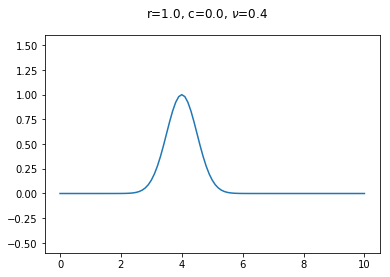

In [8]:
# PDE Resolution

# Matrices associated to the scheme
A=np.diag(np.array((Nx-2)*[1]),1)-np.diag(np.array((Nx-2)*[1]),-1)
A[0,Nx-2]=-1
A[Nx-2,0]=1
A=-c*dt/(2*dx)*A

B=-2*np.diag(np.array((Nx-1)*[1]))+np.diag(np.array((Nx-2)*[1]),1)+np.diag(np.array((Nx-2)*[1]),-1)
B[0,Nx-2]=1
B[Nx-2,0]=1
B=nu*dt/(dx**2)*B

mat=(1-r*dt)*np.eye(Nx-1)+A+B

# Initialization
u=np.zeros((Nx,Nt))
u[:,0:1]=u_init(x).reshape(len(x),1)

# Time loop
for n in range(0,Nt-1):
    u[0:Nx-1,n+1:n+2]=np.dot(mat,u[0:Nx-1,n:n+1])
    u[Nx-1,n+1]=u[0,n+1] # periodic condition
    
    

# plot of the time evolution
plt.rcParams["animation.html"] = "jshtml"
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
l, = ax.plot([0,L],[-0.5,1.5])

animate = lambda n: l.set_data(x, u[:,n])
fig.suptitle(rf'r={r}, c={c}, $\nu$={nu}')

ani = FuncAnimation(fig, animate, frames=Nt)
ani


In [20]:
display(Markdown(r'$\min_{n,j} u^n_j=$'))
print(np.amin(u))
display(Markdown(r'$\max_{n,j} u^n_j=$'))
print(np.amax(u))

$\min_{n,j} u^n_j=$

5.380186160021138e-32


$\max_{n,j} u^n_j=$

1.0
